# TIME SERIES ANALYSIS OF CRYPTOCURRENCY AND PREDICTION USING DIFFERENT REGRESSION MODELS

## 1. Reading CSV file and importing libraries

In [ ]:
#Importing different libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [ ]:
#for calculating the indicators of cryptocurrency

import ta     #for calculating indicators

In [ ]:
#Reading the csv file

crypto = pd.read_csv('/content/bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv')
crypto.head()

ParserError: ignored

## 2. Data Preprocessing and Data cleaning

In [ ]:
crypto.rename(columns={"Volume_(BTC)" : "Volume_BTC", "Volume_(Currency)" : "Volume_Currency"}, inplace=True)

In [ ]:
crypto.shape

(4363457, 8)

In [ ]:
crypto.isna().sum()

Timestamp                0
Open               1236977
High               1236977
Low                1236977
Close              1236977
Volume_BTC         1236977
Volume_Currency    1236977
Weighted_Price     1236977
dtype: int64

In [ ]:
crypto.isnull().mean().round(4) * 100

Timestamp           0.00
Open               28.35
High               28.35
Low                28.35
Close              28.35
Volume_BTC         28.35
Volume_Currency    28.35
Weighted_Price     28.35
dtype: float64

In [ ]:
#Converting the timestamp into Date time format

crypto['Datetime'] = pd.to_datetime(crypto['Timestamp'],
                                  unit='s')

In [ ]:
#Setting the Datetime column to index and droping it

crypto.set_index('Datetime', inplace=True, drop=True)

In [ ]:
#Droping the Timestamp column

crypto.drop(['Timestamp'],axis=1,inplace=True)

In [ ]:
crypto.head()

,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price
Datetime,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Resampling dataset to 15 minutes timeframe

In [ ]:
#Creating another

df = pd.DataFrame()

df = crypto.resample('15T').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume_BTC': 'sum',
    'Volume_Currency': 'sum',
    'Weighted_Price': 'mean'
})
# df['Open'] = crypto['Open'].resample('15T').first()
# df['High'] = crypto['High'].resample('15T').max()
# df['Low'] = crypto['Low'].resample('15T').min()
# df['Close'] = crypto['Close'].resample('15T').last()
# df['Volume_BTC'] =
# df['Weighted_Price'] = crypto['Weighted_Price'].resample('15T').mean()

In [ ]:
df.head()

,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price
Datetime,,,,,,,
2011-12-31 07:45:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 08:00:00,NaN,NaN,NaN,NaN,0.000000,0.0,NaN
2011-12-31 08:15:00,NaN,NaN,NaN,NaN,0.000000,0.0,NaN
2011-12-31 08:30:00,NaN,NaN,NaN,NaN,0.000000,0.0,NaN
2011-12-31 08:45:00,NaN,NaN,NaN,NaN,0.000000,0.0,NaN


In [ ]:
df.shape

(291330, 7)

In [ ]:
df.isna().sum()

Open               26456
High               26456
Low                26456
Close              26456
Volume_BTC             0
Volume_Currency        0
Weighted_Price     26456
dtype: int64

In [ ]:
df.dropna(inplace=True, axis=0)

In [ ]:
df.shape

(264874, 7)

In [ ]:
df.isna().sum()

Open               0
High               0
Low                0
Close              0
Volume_BTC         0
Volume_Currency    0
Weighted_Price     0
dtype: int64

## 3.  Adding indicators (EMA and SMA)

In [ ]:
#EMA indicator

period = 12
df['EMA'] = df['Close'].ewm(span=period, adjust=False).mean()

In [ ]:
#RSI indicator
period = 15
rsi_indicator = ta.momentum.RSIIndicator(close=df['Close'], window=period)
df['RSI'] = rsi_indicator.rsi()

In [ ]:
#SMA indicator

period = 10
df['SMA'] = df['Close'].rolling(window=period).mean()

In [ ]:
df

,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price,EMA,RSI,SMA
Datetime,,,,,,,,,,
2011-12-31 07:45:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,4.390000,NaN,NaN
2011-12-31 15:45:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,4.390000,NaN,NaN
2011-12-31 16:45:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,4.417692,NaN,NaN
2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,4.442663,NaN,NaN
2012-01-01 04:15:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,4.463792,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-04-21 23:00:00,6903.95,6911.30,6894.20,6900.89,22.485186,155240.000503,6903.854865,6895.976776,56.129674,6897.690
2020-04-21 23:15:00,6896.42,6901.94,6890.61,6897.44,13.698191,94465.922055,6895.768383,6896.201887,54.725120,6898.102
2020-04-21 23:30:00,6891.09,6896.96,6847.99,6857.51,79.414297,545532.955410,6878.748569,6890.249289,41.765161,6894.707


In [ ]:
df['Next_close'] = df['Close'].shift(-1)
df['Increase'] = np.where(df['Next_close']>df['Close'],1,0)

In [ ]:
correlation_matrix = df[['Close','Volume_BTC','Weighted_Price','EMA', 'RSI', 'SMA']].corr()
correlation_matrix

,Close,Volume_BTC,Weighted_Price,EMA,RSI,SMA
Close,1.000000,-0.012863,0.999991,0.999940,-0.019024,0.999929
Volume_BTC,-0.012863,1.000000,-0.012827,-0.012163,-0.049344,-0.012177
Weighted_Price,0.999991,-0.012827,1.000000,0.999951,-0.019653,0.999942
EMA,0.999940,-0.012163,0.999951,1.000000,-0.024120,0.999996
RSI,-0.019024,-0.049344,-0.019653,-0.024120,1.000000,-0.023880
SMA,0.999929,-0.012177,0.999942,0.999996,-0.023880,1.000000


In [ ]:
df = df[["Close",'EMA','SMA','Next_close']]
df_columns = list(df.columns[:-1])
df_columns

['Close', 'EMA', 'SMA']

In [ ]:
df.dropna(inplace=True, axis =0)

/tmp/ipykernel_5939/929031933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True, axis =0)


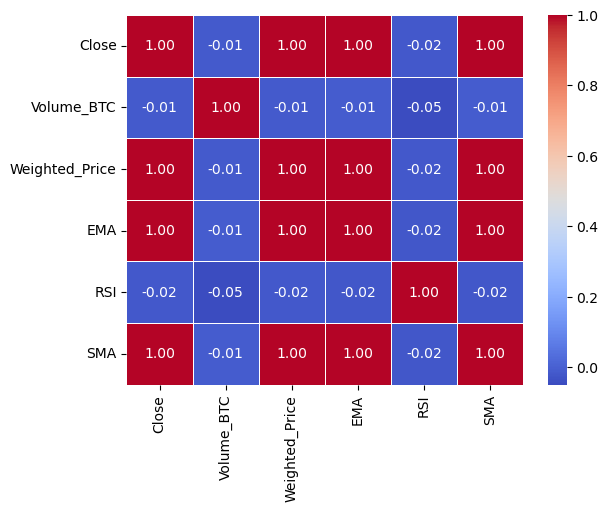

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [ ]:

# Linear Regression
from sklearn.linear_model import LinearRegression



Prediction using  Close  feature
	Mean Squared Error: 1132.0806998576836
	R-squared: 0.999815319973828


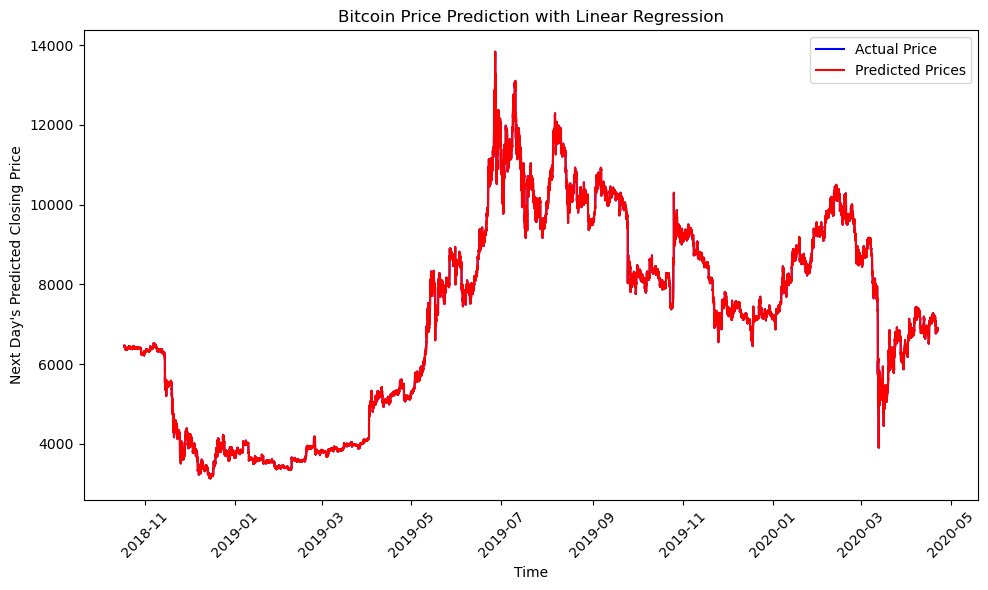

Prediction using  EMA  feature
	Mean Squared Error: 3626.8645243123337
	R-squared: 0.9994083377312619


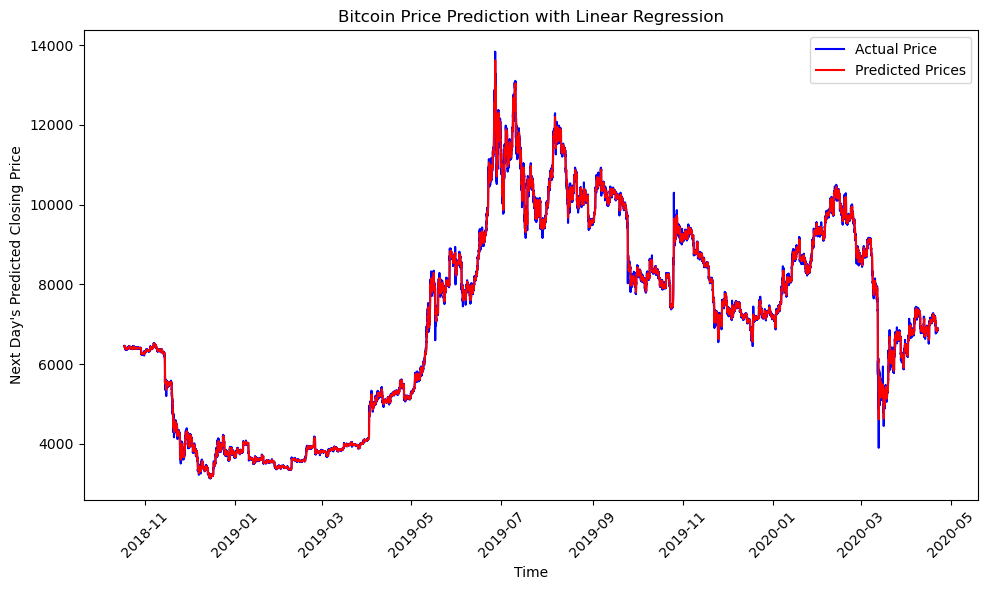

Prediction using  SMA  feature
	Mean Squared Error: 4030.720516868339
	R-squared: 0.9993424553826941


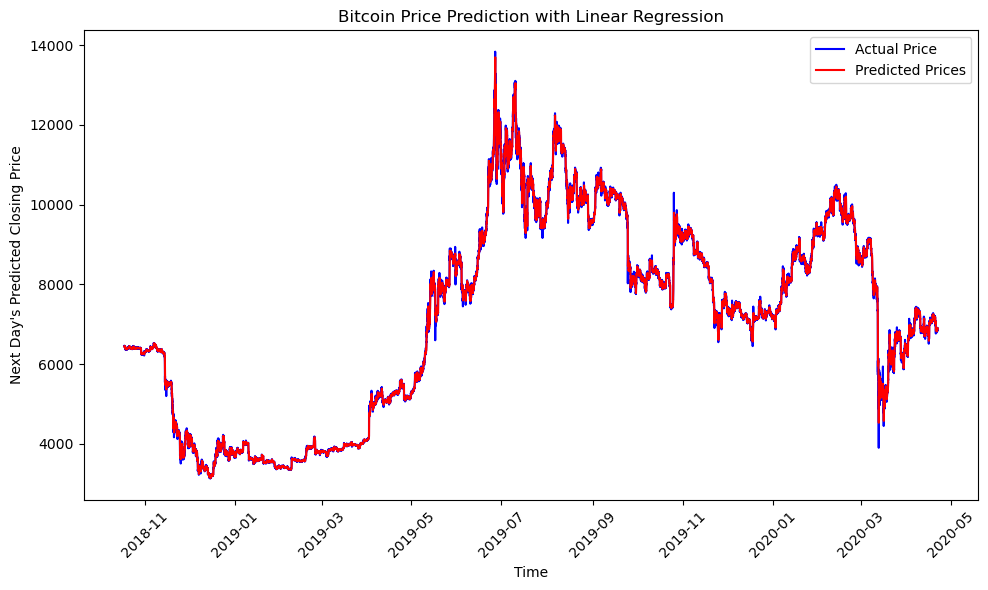

In [ ]:
for i in df_columns:
    x = df[[i]]
    y = df[['Next_close']]
    train_size = int(0.8 * len(x))
    x_train, x_test = x[:train_size], x[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Prediction using ",i," feature")
    print(f"\tMean Squared Error: {mse}")
    print(f"\tR-squared: {r2}")
    # Get the timestamps for the test set
    timestamps_test = df.index[train_size:].values
    timestamps_train = df.index[:train_size].values

    # Visualize the results: Plot time vs. predicted prices
    plt.figure(figsize=(10, 6))
    # plt.plot(timestamps_train, y_train, color = 'blue', label = 'Actual Price')
    plt.plot(timestamps_test, y_test, color = 'blue', label = 'Actual Price')
    plt.plot(timestamps_test, y_pred, color='red', label='Predicted Prices')
    plt.xlabel('Time')
    plt.ylabel('Next Day\'s Predicted Closing Price')
    plt.title('Bitcoin Price Prediction with Linear Regression')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
#Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures


Prediction using Close  feature
	Mean Squared Error: 4030.720516868339
	R-squared: 0.999815319973828


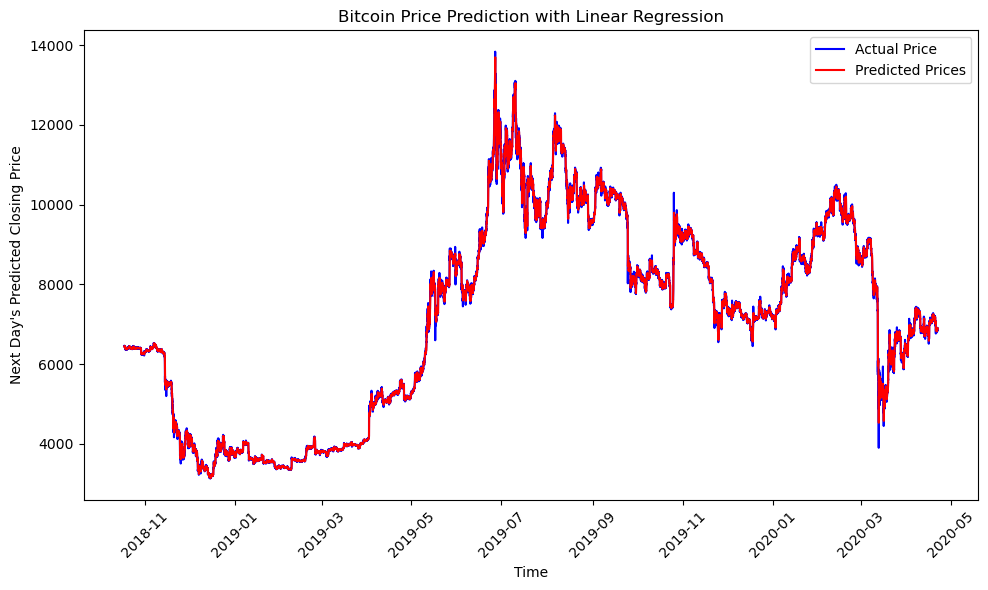

Prediction using EMA  feature
	Mean Squared Error: 4030.720516868339
	R-squared: 0.9994083377312619


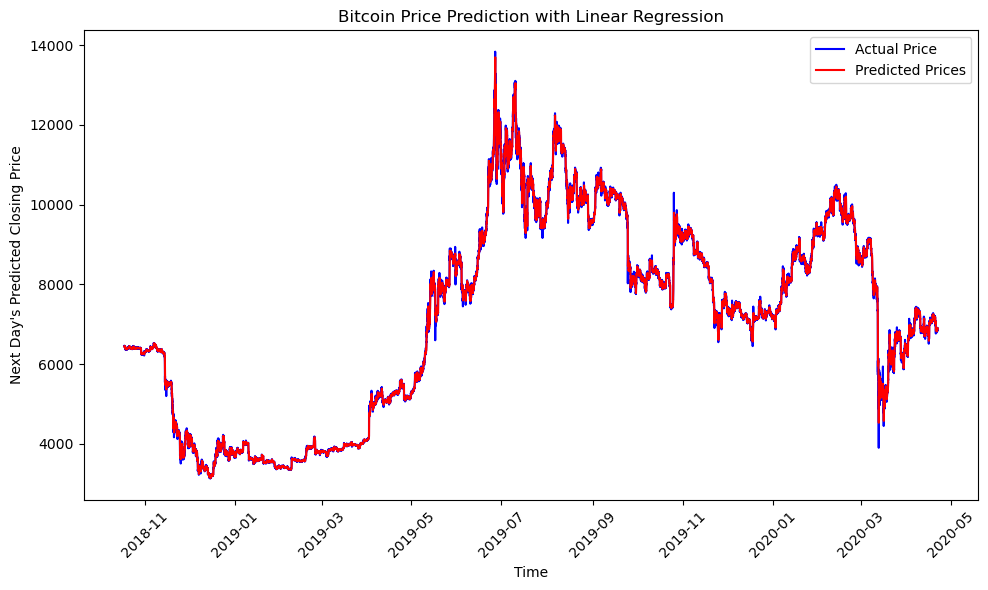

Prediction using SMA  feature
	Mean Squared Error: 4030.720516868339
	R-squared: 0.9993424553826941


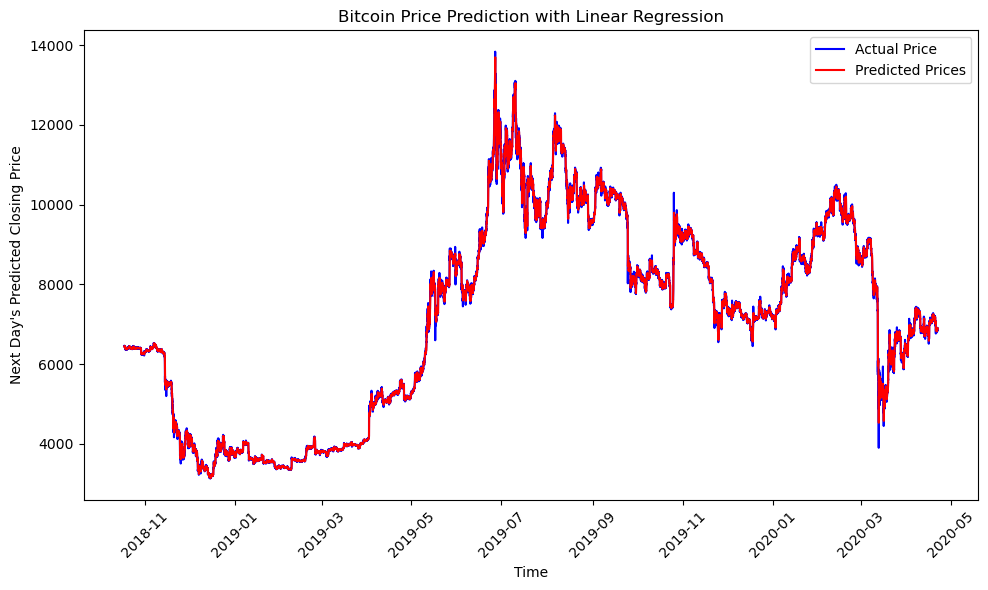

In [ ]:
for i in df_columns:
    x = df[[i]]
    y = df[['Next_close']]
    train_size = int(0.8 * len(x))
    x_train, x_test = x[:train_size], x[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    # Apply polynomial regression (degree=2)
    poly_features = PolynomialFeatures(degree=1)
    x_train_poly = poly_features.fit_transform(x_train)
    x_test_poly = poly_features.transform(x_test)
    poly_model = LinearRegression()
    poly_model.fit(x_train_poly, y_train)
    # Make predictions using the test data
    y_pred_poly = poly_model.predict(x_test_poly)
    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score( y_test, y_pred_poly)
    print("Prediction using",i," feature" )
    print(f"\tMean Squared Error: {mse}")
    print(f"\tR-squared: {r2}")

    # Get the timestamps for the test set
    timestamps_test = df.index[train_size:].values
    timestamps_train = df.index[:train_size].values

    # Visualize the results: Plot time vs. predicted prices
    plt.figure(figsize=(10, 6))
    # plt.plot(timestamps_train, y_train, color = 'blue', label = 'Actual Price')
    plt.plot(timestamps_test, y_test, color = 'blue', label = 'Actual Price')
    plt.plot(timestamps_test, y_pred, color='red', label='Predicted Prices')
    plt.xlabel('Time')
    plt.ylabel('Next Day\'s Predicted Closing Price')
    plt.title('Bitcoin Price Prediction with Linear Regression')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
#Lasso Regression

from sklearn.linear_model import Lasso

Prediction using Close  feature
	Mean Squared Error: 1132.0807002587471
	R-squared: 0.9998153199737626


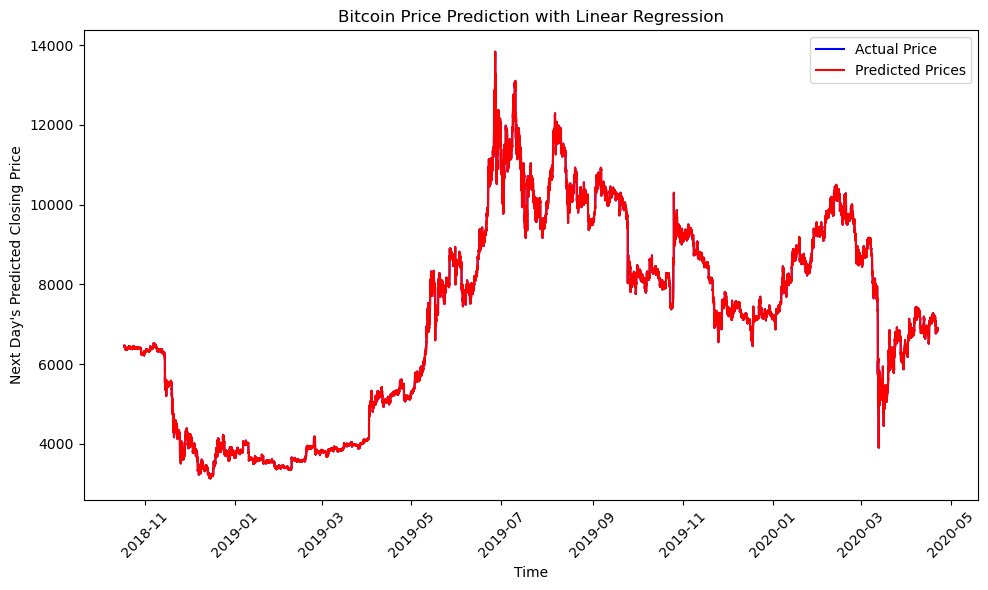

Prediction using EMA  feature
	Mean Squared Error: 3626.864521880424
	R-squared: 0.9994083377316587


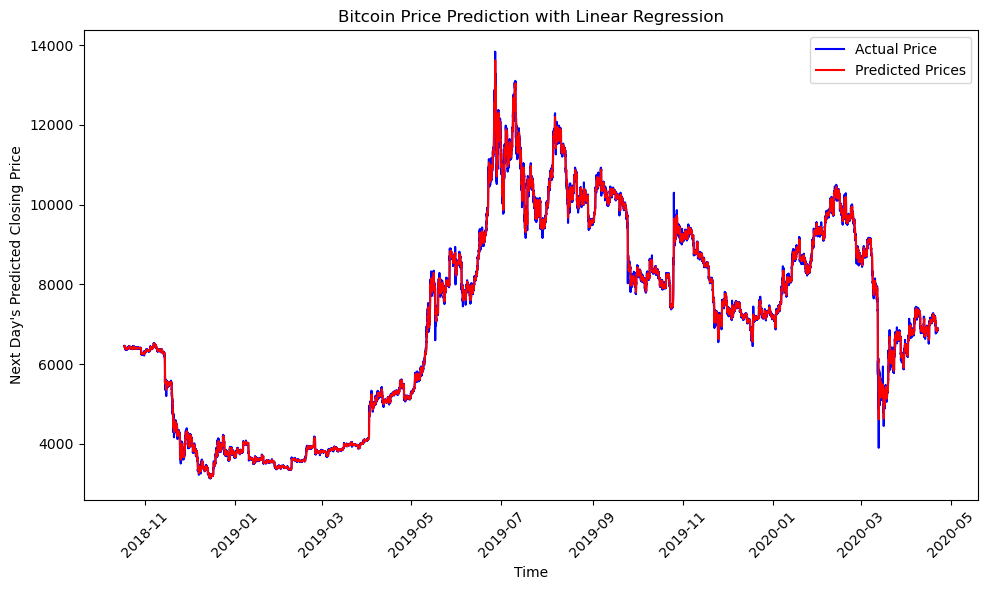

Prediction using SMA  feature
	Mean Squared Error: 4030.7205160512917
	R-squared: 0.9993424553828274


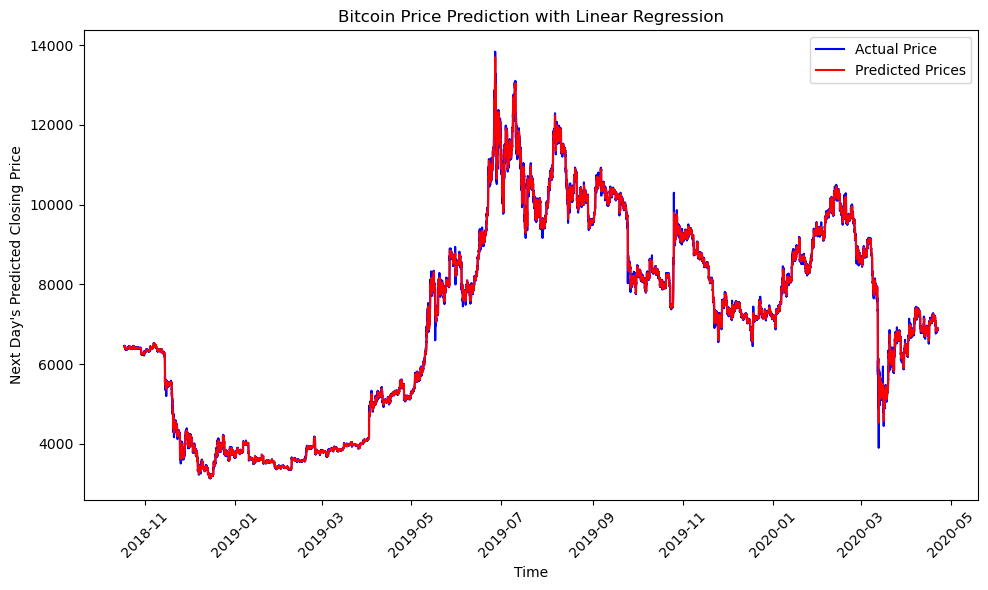

In [ ]:
for i in df_columns:
    x = df[[i]]
    y = df[['Next_close']]
    train_size = int(0.8 * len(x))
    x_train, x_test = x[:train_size], x[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    model = Lasso(alpha=0.01)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Prediction using",i," feature" )
    print(f"\tMean Squared Error: {mse}")
    print(f"\tR-squared: {r2}")
    # Get the timestamps for the test set
    timestamps_test = df.index[train_size:].values
    timestamps_train = df.index[:train_size].values

    # Visualize the results: Plot time vs. predicted prices
    plt.figure(figsize=(10, 6))
    # plt.plot(timestamps_train, y_train, color = 'blue', label = 'Actual Price')
    plt.plot(timestamps_test, y_test, color = 'blue', label = 'Actual Price')
    plt.plot(timestamps_test, y_pred, color='red', label='Predicted Prices')
    plt.xlabel('Time')
    plt.ylabel('Next Day\'s Predicted Closing Price')
    plt.title('Bitcoin Price Prediction with Linear Regression')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

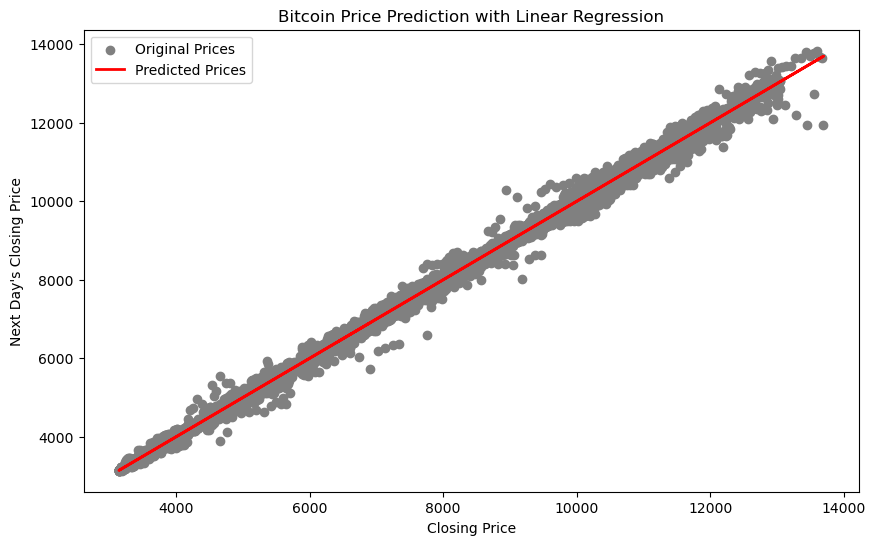

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='gray', label='Original Prices')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Closing Price')
plt.ylabel('Next Day\'s Closing Price')
plt.title('Bitcoin Price Prediction with Linear Regression')
plt.legend()
plt.show()

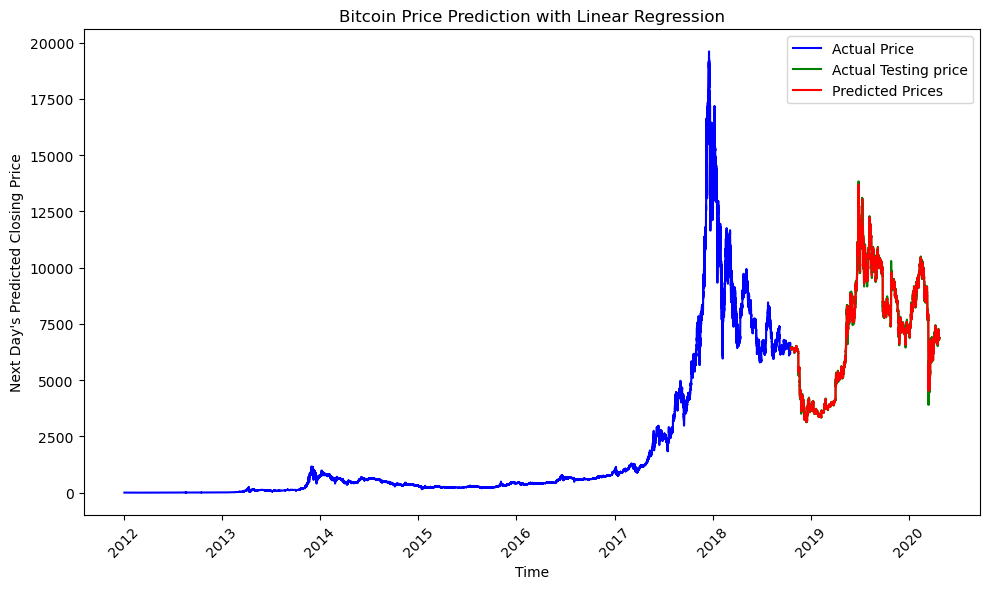

In [ ]:
# Get the timestamps for the test set
timestamps_test = df.index[train_size:].values
timestamps_train = df.index[:train_size].values

# Visualize the results: Plot time vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(timestamps_train, y_train, color = 'blue', label = 'Actual Price')
plt.plot(timestamps_test, y_test, color = 'green', label = 'Actual Testing price')
plt.plot(timestamps_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Next Day\'s Predicted Closing Price')
plt.title('Bitcoin Price Prediction with Linear Regression')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()